<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_11_predict_customer_churn_IBM_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
import tensorflow as tf
from tensorflow import keras

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 


As customers have more options for similar content to consume or similar products and
services to shop for, it has become more difficult for many businesses to retain their
customers and not lose them to other competitors. As the cost of acquiring new customers
is typically higher than that of retaining and keeping existing customers, customer churn is
becoming more and more of a concern than ever before. In order to retain existing
customers and not lose them to competitors, businesses should not only try to understand
their customers and their customers' needs and interests, but they should also be able to
identify which customers are highly likely to churn and how to retain these customers at
churn risk.

In this chapter, we are going to dive deeper into customer churn and how it hurts
businesses, as well as how to retain existing customers. We will discuss some of the
common reasons for customers leaving businesses and look at how data science can help
reduce the risk of losing customers. As a way of predicting customer churn, we will learn
about what an artificial neural network model is and its applications in different areas, as
well as how we can build one using Python and 

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

# Data analysis

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'].mean()

0.2653698707936959

In [ ]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [ ]:
df = df.dropna()

# Standard scaler

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


As you can see from the summary statistics, the three tenure, MonthlyCharges,
and TotalCharges continuous variables all have different scales. The
tenure variable, ranges from 1 to 72, while the TotalCharges variable , ranges
from 18.8 to 8684.8. ANN models typically perform better with scaled or
normalized features. Take a look at the following code for normalizing these three
features:

In [ ]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

As you can see from this code, we apply log-transform first and then normalize
the continuous variables by subtracting by the mean and dividing the values by
standard deviations. The results look like the following:

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.028756e-16,4.688495e-14,7.150708e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.054244,-2.281382,0
1,5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.032896,0.389269,0
2,3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.061298,-1.452520,1
3,7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.467578,0.372439,0
4,9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.396862,-1.234860,1


As you see from this output, all the variables now have a mean of 0 and a
standard deviation of 1. We are going to use these normalized variables for future
model building.

# One hot encoding

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
print(df.shape)
df.nunique()

(7032, 21)


customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

As this output suggests, there are 7032 unique customer IDs, 2 unique genders, 3 unique
values for MultipleLines, and 6530 unique values for TotalCharges. We have handled
the tenure, MonthlyCharges, and TotalCharges variables, in the previous step, so we
are going to focus on those variables with 2 to 4 unique values

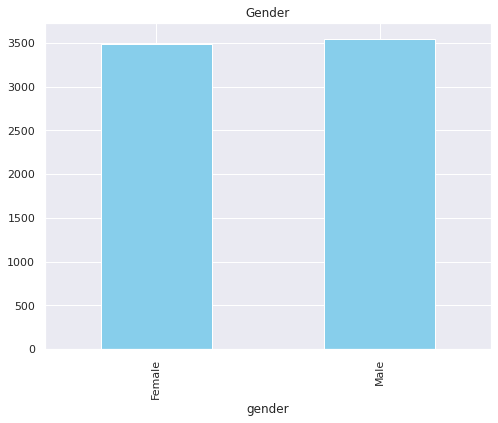

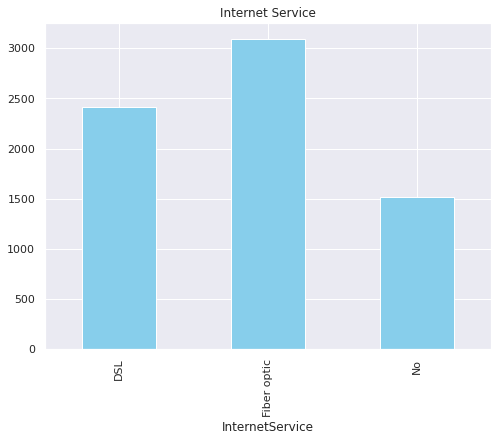

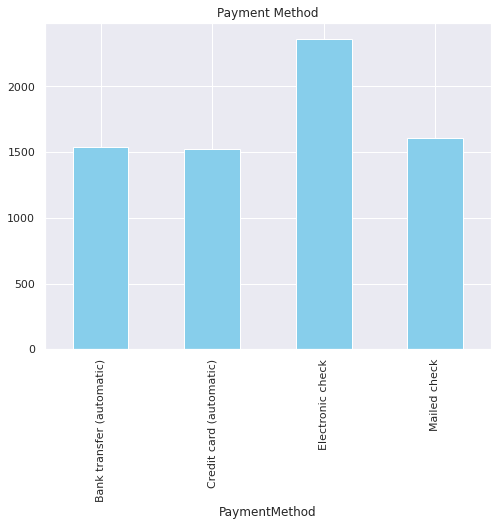

In [ ]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [ ]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,DependentsNo,DependentsYes,PhoneServiceNo,PhoneServiceYes,MultipleLinesNo,MultipleLinesNo phone service,MultipleLinesYes,InternetServiceDSL,InternetServiceFiber optic,InternetServiceNo,OnlineSecurityNo,OnlineSecurityNo internet service,OnlineSecurityYes,OnlineBackupNo,OnlineBackupNo internet service,OnlineBackupYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,TechSupportNo,TechSupportNo internet service,TechSupportYes,StreamingTVNo,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo,StreamingMoviesNo internet service,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [ ]:
sample_set.shape

(7032, 47)

In [ ]:
list(sample_set.columns)

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderFemale',
 'genderMale',
 'SeniorCitizen0',
 'SeniorCitizen1',
 'PartnerNo',
 'PartnerYes',
 'DependentsNo',
 'DependentsYes',
 'PhoneServiceNo',
 'PhoneServiceYes',
 'MultipleLinesNo',
 'MultipleLinesNo phone service',
 'MultipleLinesYes',
 'InternetServiceDSL',
 'InternetServiceFiber optic',
 'InternetServiceNo',
 'OnlineSecurityNo',
 'OnlineSecurityNo internet service',
 'OnlineSecurityYes',
 'OnlineBackupNo',
 'OnlineBackupNo internet service',
 'OnlineBackupYes',
 'DeviceProtectionNo',
 'DeviceProtectionNo internet service',
 'DeviceProtectionYes',
 'TechSupportNo',
 'TechSupportNo internet service',
 'TechSupportYes',
 'StreamingTVNo',
 'StreamingTVNo internet service',
 'StreamingTVYes',
 'StreamingMoviesNo',
 'StreamingMoviesNo internet service',
 'StreamingMoviesYes',
 'ContractMonth-to-month',
 'ContractOne year',
 'ContractTwo year',
 'PaperlessBillingNo',
 'PaperlessBillingYes',
 'PaymentMethodBank transfer (au

# Train & Test Sets

In [ ]:
X = sample_set.drop(columns='Churn')
y= sample_set['Churn']
print(X.shape)
print(y.shape)

(7032, 46)
(7032,)


In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

# Try different model

In [ ]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    
}


In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


KNN
time : 3.856 

KNN: train_acc: 0.78 train_rec_macro: 0.78 train_prec_macro: 0.80   test_acc: 0.69 test_rec_macro: 0.69 test_prec_macro: 0.70   fit_time: 0.02
LR
time : 0.586 

LR: train_acc: 0.72 train_rec_macro: 0.72 train_prec_macro: 0.76   test_acc: 0.72 test_rec_macro: 0.72 test_prec_macro: 0.76   fit_time: 0.09
LDA
time : 0.393 

LDA: train_acc: 0.72 train_rec_macro: 0.72 train_prec_macro: 0.76   test_acc: 0.72 test_rec_macro: 0.72 test_prec_macro: 0.76   fit_time: 0.05
CART
time : 0.263 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.66 test_rec_macro: 0.66 test_prec_macro: 0.66   fit_time: 0.03
NB
time : 0.130 

NB: train_acc: 0.75 train_rec_macro: 0.75 train_prec_macro: 0.69   test_acc: 0.75 test_rec_macro: 0.75 test_prec_macro: 0.69   fit_time: 0.01
SVC
time : 7.140 

SVC: train_acc: 0.74 train_rec_macro: 0.74 train_prec_macro: 0.79   test_acc: 0.71 test_rec_macro: 0.71 test_prec_macro: 0.75   fit_time: 0.74
RF
time : 2.842 

RF: train_ac

In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
1,LR,0.723029,0.723029,0.760516,0.737065,0.723531,0.723531,0.761932,0.738131,0.090791,0.585585
2,LDA,0.724188,0.724188,0.756228,0.736716,0.724539,0.724539,0.758694,0.737874,0.052589,0.393398
7,AB,0.722097,0.722097,0.752299,0.734022,0.732681,0.732681,0.764799,0.745453,0.276740,1.782554
8,GBM,0.720165,0.720165,0.753806,0.733087,0.768259,0.768259,0.808703,0.784436,0.829189,4.285435
10,XGB,0.716862,0.716862,0.749388,0.729445,0.754279,0.754279,0.792835,0.769577,0.470081,2.541536
5,SVC,0.706234,0.706234,0.750305,0.721675,0.740276,0.740276,0.791326,0.758843,0.740925,7.140214
11,LGBM,0.702356,0.702356,0.733361,0.714208,0.877746,0.877746,0.896677,0.886512,0.151478,1.047636
6,RF,0.684271,0.684271,0.719965,0.697026,0.997086,0.997086,0.997220,0.997153,0.456404,2.842230
0,KNN,0.689204,0.689204,0.701583,0.694595,0.780175,0.780175,0.800183,0.789088,0.019398,3.856181
4,NB,0.747195,0.747195,0.693491,0.679375,0.747320,0.747320,0.693229,0.680111,0.005824,0.129984


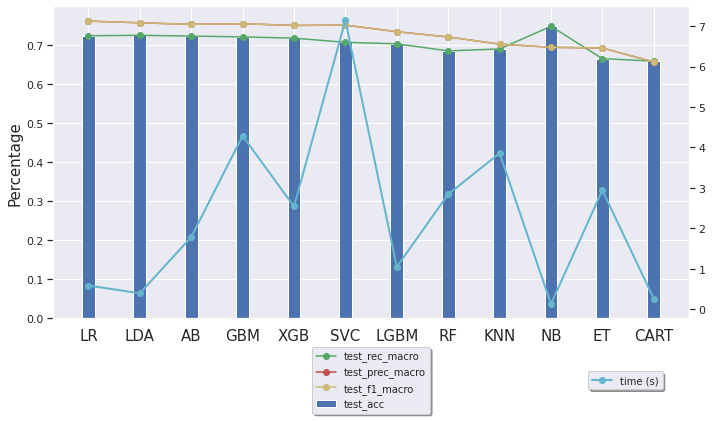

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
model=LogisticRegression(C=1,max_iter=100000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('Accuracy score:',accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[923 110]
 [196 178]]
Accuracy score: 0.7825159914712153
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
model=LGBMClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



In [ ]:
svc = SVC(gamma=0.001)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print('accuracy_score:',accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[959  74]
 [217 157]]
accuracy_score: 0.7931769722814499
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.68      0.42      0.52       374

    accuracy                           0.79      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.79      0.78      1407



# Aritificial Neural Network (ANN) with Keras

In [ ]:
def plot_loss(history, label):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               #color=colors[n], 
               label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          #color=colors[n], 
          label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

## Base model

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                752       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape

(4500, 46)

In [ ]:
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_accuracy", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            #ModelCheckpoint(filepath="best_model.h5",
            #                monitor="val_auc",
            #                save_best_only=True)
            ]
#training the moodel
result=model.fit(X_train, y_train,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)

Train on 4500 samples, validate on 1125 samples
Epoch 1/200
 - 0s - loss: 0.7282 - accuracy: 0.4851 - val_loss: 0.6356 - val_accuracy: 0.7342
Epoch 2/200
 - 0s - loss: 0.5751 - accuracy: 0.7451 - val_loss: 0.5257 - val_accuracy: 0.7627
Epoch 3/200
 - 0s - loss: 0.4748 - accuracy: 0.7891 - val_loss: 0.4525 - val_accuracy: 0.7929
Epoch 4/200
 - 0s - loss: 0.4278 - accuracy: 0.8020 - val_loss: 0.4328 - val_accuracy: 0.8027
Epoch 5/200
 - 0s - loss: 0.4168 - accuracy: 0.8040 - val_loss: 0.4277 - val_accuracy: 0.8009
Epoch 6/200
 - 0s - loss: 0.4128 - accuracy: 0.8064 - val_loss: 0.4254 - val_accuracy: 0.8036
Epoch 7/200
 - 0s - loss: 0.4104 - accuracy: 0.8080 - val_loss: 0.4234 - val_accuracy: 0.8053
Epoch 8/200
 - 0s - loss: 0.4084 - accuracy: 0.8082 - val_loss: 0.4232 - val_accuracy: 0.8027
Epoch 9/200
 - 0s - loss: 0.4071 - accuracy: 0.8080 - val_loss: 0.4209 - val_accuracy: 0.8027
Epoch 10/200
 - 0s - loss: 0.4058 - accuracy: 0.8096 - val_loss: 0.4204 - val_accuracy: 0.8018


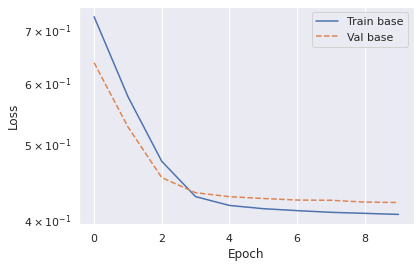

In [ ]:
plot_loss(result,'base')

In [ ]:
predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



## Turning different model

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model3 =Sequential()
model3.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model3.add(Dropout(DROPOUT))
#----hiden layer-------#
model3.add(Dense(20,activation='relu'))
model3.add(Dropout(DROPOUT))
model3.add(Dense(10,activation='relu'))
model3.add(Dropout(DROPOUT))
#----output-------#
model3.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
model3.summary()
# compiling the model
model3.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                1410      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            #ModelCheckpoint(filepath="best_model.h5",
            #                monitor="val_auc",
            #                save_best_only=True)
            ]
#training the moodel
result=model3.fit(X_train, y_train,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)

Train on 4500 samples, validate on 1125 samples
Epoch 1/200
 - 0s - loss: 0.3733 - tp: 165173.9375 - fp: 76240.5781 - tn: 751434.8750 - fn: 134450.6875 - accuracy: 0.8131 - precision: 0.6842 - recall: 0.5513 - auc: 0.8578 - val_loss: 0.4535 - val_tp: 165611.0781 - val_fp: 76447.4141 - val_tn: 753334.6875 - val_fn: 134750.5781 - val_accuracy: 0.8131 - val_precision: 0.6842 - val_recall: 0.5514 - val_auc: 0.8578
Epoch 2/200
 - 0s - loss: 0.3718 - tp: 166054.5625 - fp: 76632.4453 - tn: 755171.7500 - fn: 135066.4062 - accuracy: 0.8131 - precision: 0.6842 - recall: 0.5515 - auc: 0.8579 - val_loss: 0.4556 - val_tp: 166488.0781 - val_fp: 76835.0000 - val_tn: 757077.0625 - val_fn: 135368.5781 - val_accuracy: 0.8132 - val_precision: 0.6842 - val_recall: 0.5515 - val_auc: 0.8579
Epoch 3/200
 - 0s - loss: 0.3726 - tp: 166938.0938 - fp: 77018.2891 - tn: 758927.4375 - fn: 135666.1406 - accuracy: 0.8132 - precision: 0.6843 - recall: 0.5517 - auc: 0.8579 - val_loss: 0.4549 - val_tp: 167390.2500 - val

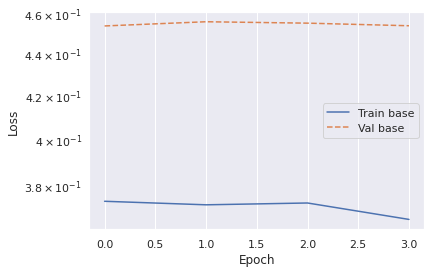

In [ ]:
plot_loss(result,'base')

In [ ]:
predictions=model3.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



## Under sampling

In [ ]:
#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
nr = NearMiss()
X_train_under, y_train_under = nr.fit_sample(X_train, y_train)
print(X_train_under.shape)
Counter(y_train_under)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2392, 46)


Counter({0: 1196, 1: 1196})

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model3 =Sequential()
model3.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model3.add(Dropout(DROPOUT))
#----hiden layer-------#
model3.add(Dense(20,activation='relu'))
model3.add(Dropout(DROPOUT))
model3.add(Dense(10,activation='relu'))
model3.add(Dropout(DROPOUT))
#----output-------#
model3.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
# model3.summary()
# compiling the model
model3.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            ]
#training the moodel
result=model3.fit(X_train_under, y_train_under,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)
predictions=model3.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

Train on 2392 samples, validate on 1125 samples
Epoch 1/200
 - 0s - loss: 0.6905 - tp: 207167.0000 - fp: 97281.5859 - tn: 968886.8125 - fn: 179164.2500 - accuracy: 0.8097 - precision: 0.6805 - recall: 0.5362 - auc: 0.8530 - val_loss: 0.6628 - val_tp: 207621.6719 - val_fp: 97717.3359 - val_tn: 969496.7500 - val_fn: 179450.0000 - val_accuracy: 0.8094 - val_precision: 0.6800 - val_recall: 0.5364 - val_auc: 0.8528
Epoch 2/200
 - 0s - loss: 0.6774 - tp: 208074.2969 - fp: 98165.6250 - tn: 970036.0000 - fn: 179740.8281 - accuracy: 0.8091 - precision: 0.6794 - recall: 0.5365 - auc: 0.8527 - val_loss: 0.6524 - val_tp: 208527.8281 - val_fp: 98554.3359 - val_tn: 970681.7500 - val_fn: 180038.8281 - val_accuracy: 0.8089 - val_precision: 0.6791 - val_recall: 0.5367 - val_auc: 0.8525
Epoch 3/200
 - 0s - loss: 0.6727 - tp: 208978.7969 - fp: 98928.9141 - tn: 971284.5625 - fn: 180341.2500 - accuracy: 0.8087 - precision: 0.6787 - recall: 0.5368 - auc: 0.8523 - val_loss: 0.6441 - val_tp: 209446.5781 - val

## SMOTE

In [ ]:
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_sample(X_train, y_train)
print(X_train_smote.shape)
Counter(y_train_smote)

(6608, 46)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 3304, 1: 3304})

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model3 =Sequential()
model3.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model3.add(Dropout(DROPOUT))
#----hiden layer-------#
model3.add(Dense(20,activation='relu'))
model3.add(Dropout(DROPOUT))
model3.add(Dense(10,activation='relu'))
model3.add(Dropout(DROPOUT))
#----output-------#
model3.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
# model3.summary()
# compiling the model
model3.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            ]
#training the moodel
result=model3.fit(X_train_smote, y_train_smote,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)
predictions=model3.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

Train on 6608 samples, validate on 1125 samples
Epoch 1/200
 - 1s - loss: 0.6548 - tp: 211574.6250 - fp: 101021.9219 - tn: 974310.8750 - fn: 181809.3750 - accuracy: 0.8074 - precision: 0.6768 - recall: 0.5378 - auc: 0.8516 - val_loss: 0.6059 - val_tp: 212787.1719 - val_fp: 101849.5859 - val_tn: 975560.5000 - val_fn: 182372.5000 - val_accuracy: 0.8070 - val_precision: 0.6763 - val_recall: 0.5385 - val_auc: 0.8513
Epoch 2/200
 - 0s - loss: 0.5966 - tp: 214014.3594 - fp: 102457.6094 - tn: 977013.6250 - fn: 182964.1094 - accuracy: 0.8067 - precision: 0.6763 - recall: 0.5391 - auc: 0.8512 - val_loss: 0.5264 - val_tp: 215245.5000 - val_fp: 103032.3359 - val_tn: 978507.7500 - val_fn: 183517.1719 - val_accuracy: 0.8064 - val_precision: 0.6763 - val_recall: 0.5398 - val_auc: 0.8511
Epoch 3/200
 - 0s - loss: 0.5409 - tp: 216543.9375 - fp: 103530.1016 - tn: 980081.1875 - fn: 184027.2656 - accuracy: 0.8063 - precision: 0.6765 - recall: 0.5406 - auc: 0.8511 - val_loss: 0.5018 - val_tp: 217858.4219 

## MSMOTE

In [ ]:
!pip install smote_variants

     |████████████████████████████████| 133kB 4.3MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7453 sha256=72120887d227ad19210b8141257c7fcb10859e2aa8e2394f7d0299aa1a51fc72
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=ceae57b0d1f91cf1708acb5f74e4ab5ac228d0b88b95110fff8f7432c7942777
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built statistics minisom


In [ ]:
import smote_variants as sv
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train), np.array(y_train))
print(X_train_msmote.shape)
Counter(y_train_msmote)

2020-06-29 10:39:00,344:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


(6608, 46)


Counter({0: 3304, 1: 3304})

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model3 =Sequential()
model3.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model3.add(Dropout(DROPOUT))
#----hiden layer-------#
model3.add(Dense(20,activation='relu'))
model3.add(Dropout(DROPOUT))
model3.add(Dense(10,activation='relu'))
model3.add(Dropout(DROPOUT))
#----output-------#
model3.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
# model3.summary()
# compiling the model
model3.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            ]
#training the moodel
result=model3.fit(X_train_msmote, y_train_msmote,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)
predictions=model3.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

Train on 6608 samples, validate on 1125 samples
Epoch 1/200
 - 1s - loss: 0.6524 - tp: 221838.7188 - fp: 106011.3906 - tn: 985841.3125 - fn: 185957.2812 - accuracy: 0.8053 - precision: 0.6766 - recall: 0.5440 - auc: 0.8510 - val_loss: 0.5988 - val_tp: 223062.0781 - val_fp: 106817.4141 - val_tn: 987112.6875 - val_fn: 186509.5781 - val_accuracy: 0.8049 - val_precision: 0.6762 - val_recall: 0.5446 - val_auc: 0.8508
Epoch 2/200
 - 0s - loss: 0.5866 - tp: 224290.2656 - fp: 107385.4141 - tn: 988605.8125 - fn: 187100.1875 - accuracy: 0.8046 - precision: 0.6762 - recall: 0.5452 - auc: 0.8507 - val_loss: 0.5216 - val_tp: 225537.6719 - val_fp: 107932.0859 - val_tn: 990128.0000 - val_fn: 187637.0000 - val_accuracy: 0.8044 - val_precision: 0.6763 - val_recall: 0.5459 - val_auc: 0.8506
Epoch 3/200
 - 0s - loss: 0.5259 - tp: 226850.7656 - fp: 108420.8516 - tn: 991710.3125 - fn: 188132.4531 - accuracy: 0.8043 - precision: 0.6766 - recall: 0.5466 - auc: 0.8506 - val_loss: 0.4853 - val_tp: 228201.9219 

## Try all method imbalanced

In [ ]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss,RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN,CondensedNearestNeighbour,OneSidedSelection,NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN,SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

In [ ]:
list_method={
# Under sampling
'NearMiss':NearMiss(),
#'RandomUnderSampler':RandomUnderSampler(random_state=0),
#'RepeatedEditedNearestNeighbours':RepeatedEditedNearestNeighbours(random_state=0), # Very long
#'AllKNN':AllKNN(random_state=0),
#'CondensedNearestNeighbour':CondensedNearestNeighbour(random_state=0),
#'OneSidedSelection':OneSidedSelection(random_state=0),
#'NeighbourhoodCleaningRule':NeighbourhoodCleaningRule(random_state=0),

# Over sampling
'RandomOverSampler':RandomOverSampler(random_state=0),
'SMOTE':SMOTE(random_state=0),
'ADASYN':ADASYN(random_state=0),
'BorderlineSMOTE-1':BorderlineSMOTE(random_state=0, kind='borderline-1'),
'BorderlineSMOTE-2':BorderlineSMOTE(random_state=0, kind='borderline-2'),
'SVMSMOTE':SVMSMOTE(random_state=0),
}

In [ ]:
def make_model():
  METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]
  tf.random.set_seed(42)
  np.random.seed(42)

  DROPOUT = 0.3
  numlabel=1
  #output_bias=0.5
  #build the model
  #----input-------#
  model3 =Sequential()
  model3.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
  model3.add(Dropout(DROPOUT))
  #----hiden layer-------#
  model3.add(Dense(20,activation='relu'))
  model3.add(Dropout(DROPOUT))
  model3.add(Dense(10,activation='relu'))
  model3.add(Dropout(DROPOUT))
  #----output-------#
  model3.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                  #bias_initializer=output_bias
                  )) 
  # model3.summary()
  # compiling the model
  model3.compile(optimizer='Adam', 
                #optimizer=keras.optimizers.SGD(lr=1e-3),
                loss='binary_crossentropy',
                metrics=METRICS)
  return model3

In [ ]:
import time
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal
callbacks = [EarlyStopping(monitor="val_recall", patience=3)]
#training the moodel
for name,method in list_method.items():
  
  t0=time.time()
  print(name)
  X_train_transform, y_train_transform= method.fit_sample(X_train, y_train)
  model=make_model()
  result=model.fit(X_train_transform, y_train_transform,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=0)
  predictions=model.predict_classes(X_test)
  #y_test_labels = np.argmax(y_test.values, axis =1)
  t1=time.time()
  print('time',t1-t0)
  print(classification_report(y_test,predictions))
  

NearMiss


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


time 2.5713160037994385
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.74      1407

RandomOverSampler


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


time 2.9513885974884033
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


time 2.793410539627075
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407

ADASYN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


time 3.1103885173797607
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407

BorderlineSMOTE-1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


time 3.304109811782837
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407

BorderlineSMOTE-2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


time 3.008932113647461
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1033
           1       0.47      0.82      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407

SVMSMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

time 4.361293077468872
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

